In [1]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [3]:
driversData= pd.read_csv('F1Drivers_Dataset.csv')

In [4]:
driversData.head(6)

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False
5,Walt Ader,United States,[1950],0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [5]:
driversData.tail(6)

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
862,Alessandro Zanardi,Italy,"[1991, 1992, 1993, 1994, 1999]",0.0,44.0,41.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,0.931818,0.0,0.0,0.000000,0.022727,5,False
863,Emilio Zapico,Spain,[1976],0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0.0,23.0,23.0,0.0,0.0,0.0,2.0,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0.0,37.0,36.0,0.0,0.0,0.0,0.0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0.0,7.0,7.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False
867,Ricardo Zunino,Argentina,"[1979, 1980, 1981]",0.0,11.0,10.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.909091,0.0,0.0,0.000000,0.000000,3,False


In [6]:
driversData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              868 non-null    object 
 1   Nationality         868 non-null    object 
 2   Seasons             868 non-null    object 
 3   Championships       868 non-null    float64
 4   Race_Entries        868 non-null    float64
 5   Race_Starts         868 non-null    float64
 6   Pole_Positions      868 non-null    float64
 7   Race_Wins           868 non-null    float64
 8   Podiums             868 non-null    float64
 9   Fastest_Laps        868 non-null    float64
 10  Points              868 non-null    float64
 11  Active              868 non-null    bool   
 12  Championship Years  34 non-null     object 
 13  Decade              868 non-null    int64  
 14  Pole_Rate           868 non-null    float64
 15  Start_Rate          868 non-null    float64
 16  Win_Rate

In [7]:
driversData.describe()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,0.084101,29.917051,27.694700,1.244240,1.247696,3.756912,1.261521,55.849459,1972.223502,0.011471,0.779824,0.011050,0.041389,0.011894,0.479158,3.664747
std,0.524883,53.780150,52.876476,6.347512,6.491921,14.432826,5.413644,265.968614,20.201084,0.046544,0.324303,0.043579,0.106457,0.043514,1.213826,3.501761
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.962251,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,29.250000,26.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1982.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.382517,5.000000
max,7.000000,359.000000,356.000000,103.000000,103.000000,191.000000,77.000000,4415.500000,2020.000000,0.557692,1.000000,0.461538,1.000000,0.500000,14.197749,19.000000


from matplotlib import pyplot as plt
_df_0['Championships'].plot(kind='hist', bins=20, title='Championships')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Race_Entries'].plot(kind='hist', bins=20, title='Race_Entries')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Race_Starts'].plot(kind='hist', bins=20, title='Race_Starts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Pole_Positions'].plot(kind='hist', bins=20, title='Pole_Positions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Championships', y='Race_Entries', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Race_Entries', y='Race_Starts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Race_Starts', y='Pole_Positions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Pole_Positions', y='Race_Wins', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Championships'].plot(kind='line', figsize=(8, 4), title='Championships')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Race_Entries'].plot(kind='line', figsize=(8, 4), title='Race_Entries')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Race_Starts'].plot(kind='line', figsize=(8, 4), title='Race_Starts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Pole_Positions'].plot(kind='line', figsize=(8, 4), title='Pole_Positions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
driversData.shape

(868, 22)

In [9]:
driversData.isnull().sum()

Driver                  0
Nationality             0
Seasons                 0
Championships           0
Race_Entries            0
Race_Starts             0
Pole_Positions          0
Race_Wins               0
Podiums                 0
Fastest_Laps            0
Points                  0
Active                  0
Championship Years    834
Decade                  0
Pole_Rate               0
Start_Rate              0
Win_Rate                0
Podium_Rate             0
FastLap_Rate            0
Points_Per_Entry        0
Years_Active            0
Champion                0
dtype: int64

In [12]:
driversData.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

In [13]:
driversData.dropna(inplace=True)
driversData.isnull().sum()


Driver                0
Nationality           0
Seasons               0
Championships         0
Race_Entries          0
Race_Starts           0
Pole_Positions        0
Race_Wins             0
Podiums               0
Fastest_Laps          0
Points                0
Active                0
Championship Years    0
Decade                0
Pole_Rate             0
Start_Rate            0
Win_Rate              0
Podium_Rate           0
FastLap_Rate          0
Points_Per_Entry      0
Years_Active          0
Champion              0
dtype: int64

In [15]:
driversData.shape

(34, 22)

In [19]:
driversData.reset_index(drop=True, inplace=True)


In [20]:
driversData.head(6)

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,...,"[2005, 2006]",2010,0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19,True
1,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,...,[1978],1980,0.137405,0.977099,0.091603,0.145038,0.076336,1.374046,14,True
2,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,...,"[1952, 1953]",1950,0.424242,0.969697,0.393939,0.515152,0.363636,3.261818,6,True
3,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,...,"[1959, 1960, 1966]",1960,0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16,True
4,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,...,[2009],2010,0.025890,0.990291,0.048544,0.161812,0.025890,3.996764,18,True
5,Jim Clark,United Kingdom,"[1960, 1961, 1962, 1963, 1964, 1965, 1966, 196...",2.0,73.0,72.0,33.0,25.0,32.0,28.0,...,"[1963, 1965]",1960,0.452055,0.986301,0.342466,0.438356,0.383562,3.493151,9,True


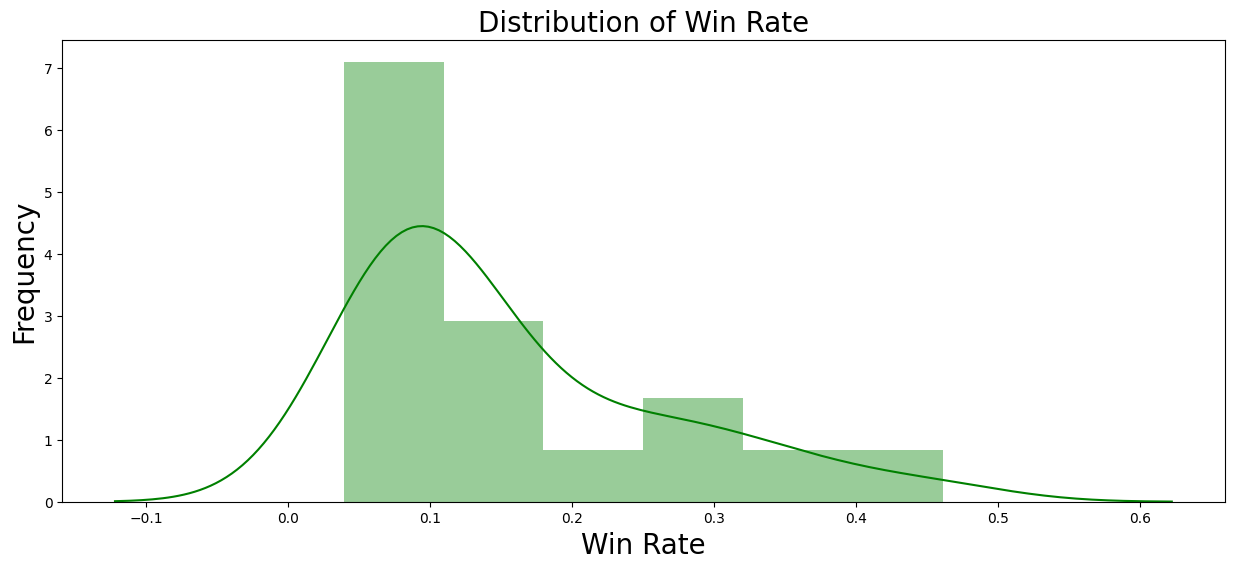

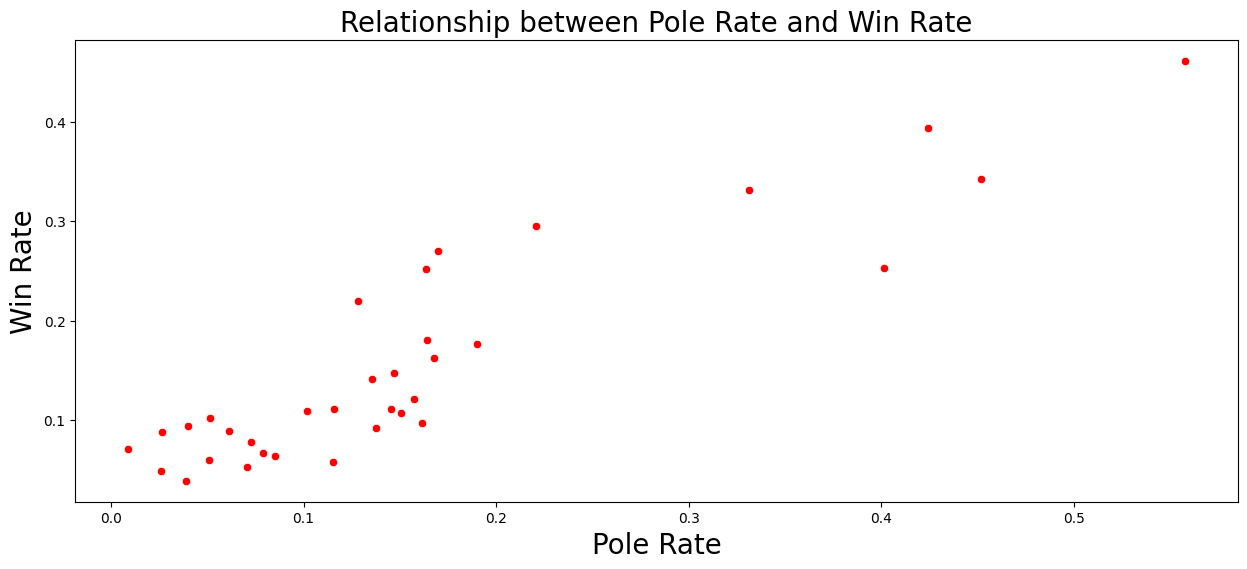

In [28]:
plt.figure(figsize=(15, 6))
sns.distplot(driversData['Win_Rate'], color='g')
plt.title('Distribution of Win Rate', fontsize=20)
plt.xlabel('Win Rate', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(x=driversData['Pole_Rate'], y=driversData['Win_Rate'], color='r')
plt.title('Relationship between Pole Rate and Win Rate', fontsize=20)
plt.xlabel('Pole Rate', fontsize=20)
plt.ylabel('Win Rate', fontsize=20)
plt.show()


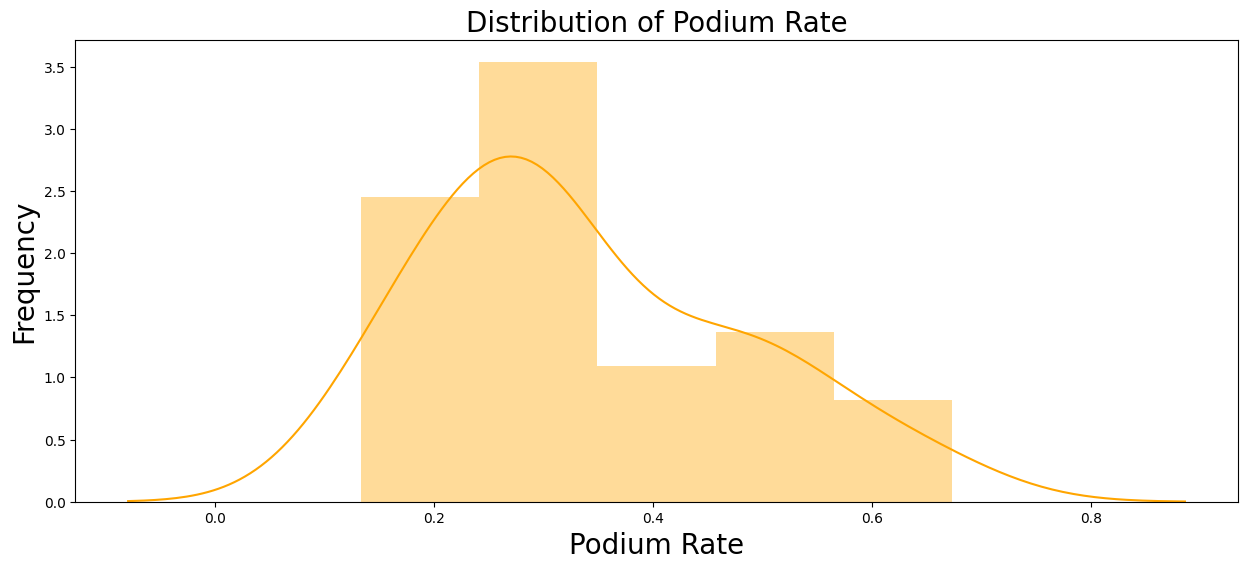

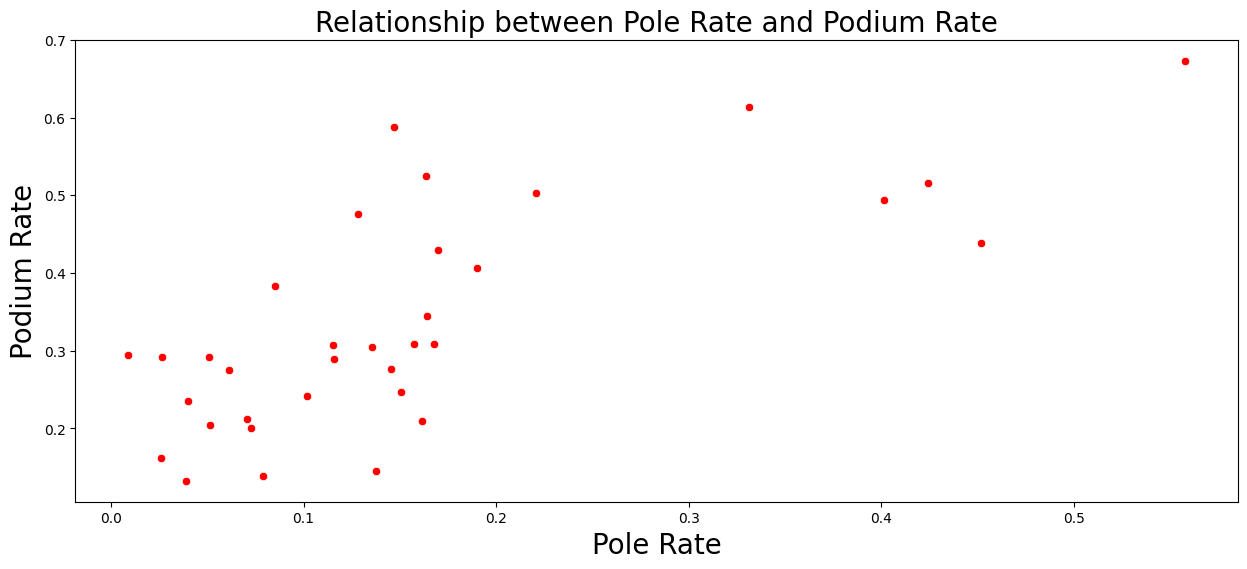

In [36]:
plt.figure(figsize=(15, 6))
sns.distplot(driversData['Podium_Rate'], color='orange')
plt.title('Distribution of Podium Rate', fontsize=20)
plt.xlabel('Podium Rate', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()


plt.figure(figsize=(15, 6))
sns.scatterplot(x=driversData['Pole_Rate'], y=driversData['Podium_Rate'], color='r')
plt.title('Relationship between Pole Rate and Podium Rate', fontsize=20)
plt.xlabel('Pole Rate', fontsize=20)
plt.ylabel('Podium Rate', fontsize=20)
plt.show()



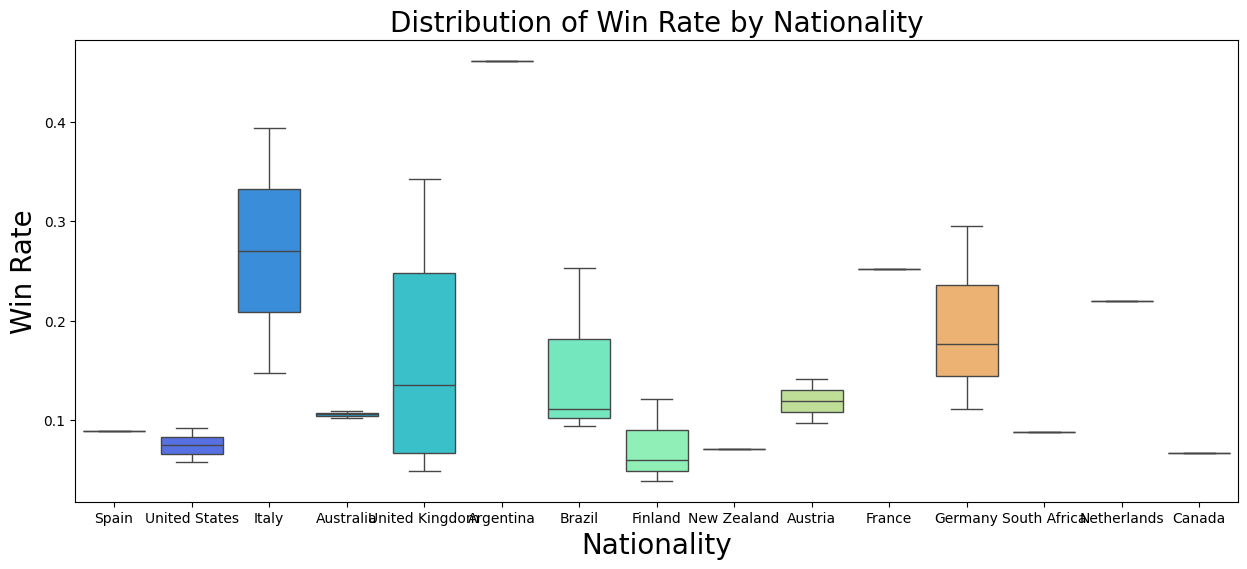

In [37]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=driversData['Nationality'], y=driversData['Win_Rate'], palette='rainbow')
plt.title('Distribution of Win Rate by Nationality', fontsize=20)
plt.xlabel('Nationality', fontsize=20)
plt.ylabel('Win Rate', fontsize=20)
plt.show()


In [44]:
features = ['Pole_Rate', 'Podium_Rate', 'Nationality']
target = 'Win_Rate'


In [45]:
x=driversData[features]
y=driversData[target]

In [48]:
encoder = OneHotEncoder()
encoded_nationality = encoder.fit_transform(x[['Nationality']])
encoded_nationality_df = pd.DataFrame(encoded_nationality.toarray(), columns=encoder.get_feature_names_out(['Nationality']))


X = x.drop('Nationality', axis=1)
X = pd.concat([X, encoded_nationality_df], axis=1)


In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [51]:
ypred = model.predict(xtest)

In [52]:
rmse= np.sqrt(mean_squared_error(ytest, ypred))
mae= mean_absolute_error(ytest, ypred)

In [54]:
print(rmse)
print(mae)

0.055693405111995324
0.04635246875432445


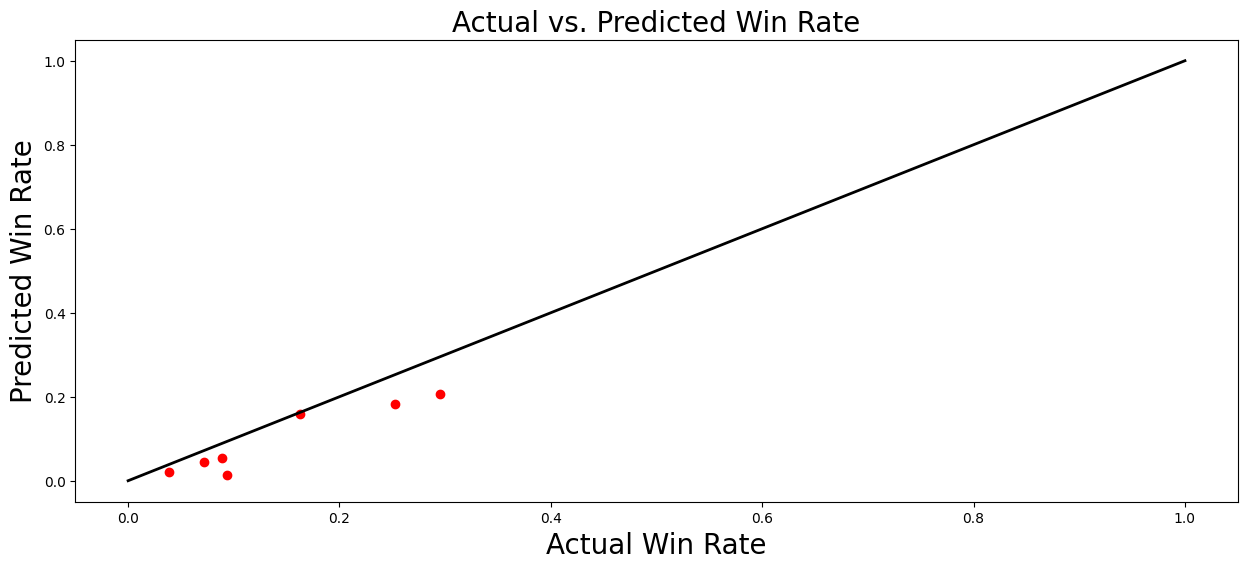

In [58]:
plt.figure(figsize=(15, 6))
plt.scatter(ytest, ypred, color='r')
plt.plot([0, 1], [0, 1], color='black', linewidth=2)
plt.title('Actual vs. Predicted Win Rate', fontsize=20)
plt.xlabel('Actual Win Rate', fontsize=20)
plt.ylabel('Predicted Win Rate', fontsize=20)
plt.show()


In [62]:
print(model.score(xtest, ytest))


38.920083207940195


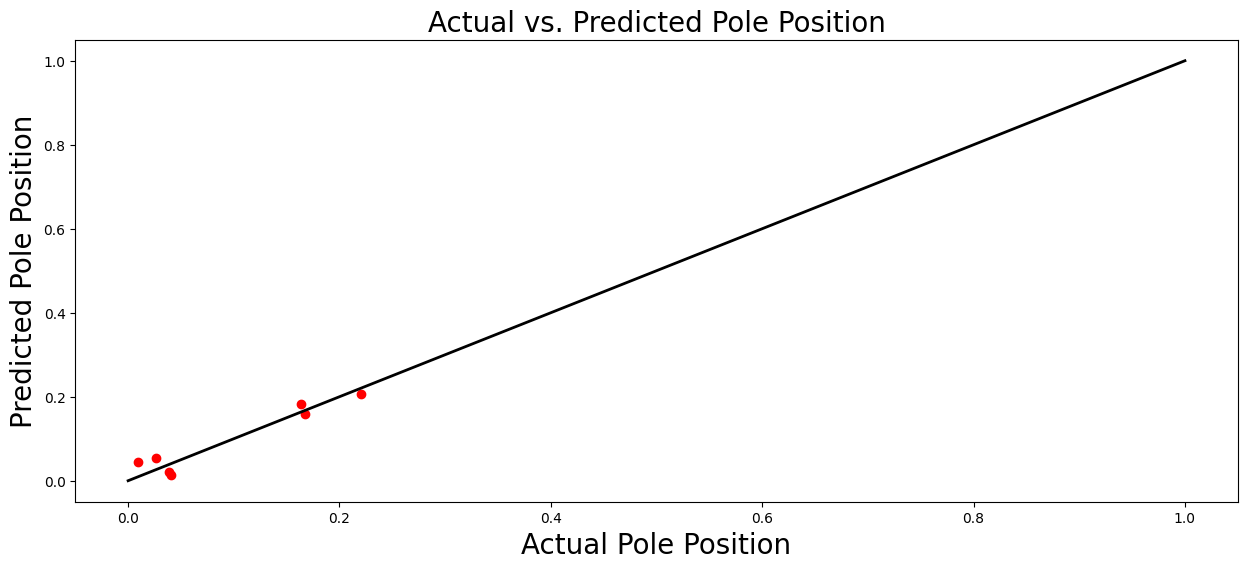

In [64]:
ypred_pole = model.predict(xtest)
plt.figure(figsize=(15, 6))
plt.scatter(xtest['Pole_Rate'], ypred_pole, color='r')
plt.plot([0, 1], [0, 1], color='black', linewidth=2)
plt.title('Actual vs. Predicted Pole Position', fontsize=20)
plt.xlabel('Actual Pole Position', fontsize=20)
plt.ylabel('Predicted Pole Position', fontsize=20)
plt.show()


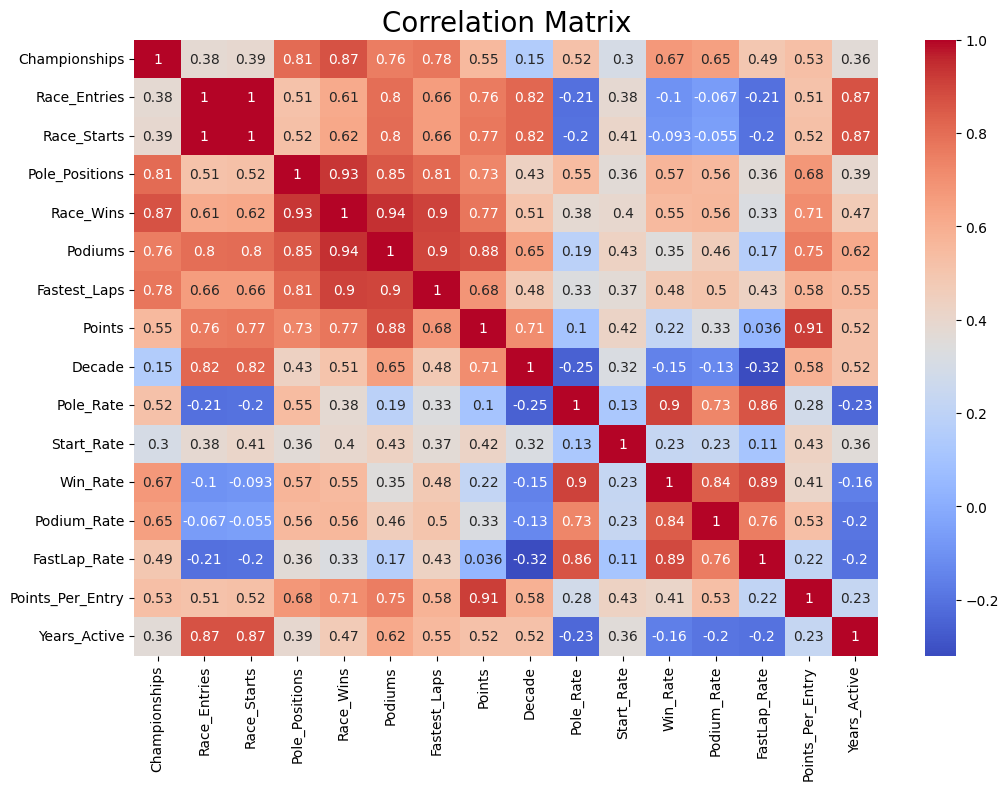

In [70]:
corr = driversData.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)
plt.show()